# DataBase LSAC | Exercise

# Install Jupyter Notebook 

* Go to ANACONDA PLATFORM  https://www.anaconda.com/ 
* Downoload and install

## 1. Check your Pyhton Version & Import Libraries

In [1]:
# Check your Pyhton Version

from platform import python_version
print(python_version())

3.7.10


In [2]:
# Import useful libraries
import numpy  as np 
import pandas as pd
import sklearn 
import os
import math
import matplotlib.pyplot as  plt
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns

# Machine Leanring libraires 
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier


# Import useful Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, confusion_matrix, make_scorer, classification_report, roc_curve, auc, f1_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 

## 2. Data Upload & Exploratory Data Analysis

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
data_path = '/content/gdrive/My Drive/Seminari/2021 Machine Learning - Basi e Sue Applicazioni/01__code/' + '04.RF  - Python [numerical-categorical data]/'

Mounted at /content/gdrive


In [5]:
# Upload data
df = pd.read_excel(data_path + 'data__clean__exercise.xlsx')

In [6]:
# Quick visual check of the head and tail of the uploaed Pandas dataframe
df.head()
#df.tail()

,Unnamed: 0,ID,EZ,D-IN,CRS-R,LCF,TR,RESP,RBI-ST-A,RBI-ST-B,PSH-AM-1,N-CRS-1,PSH-AM-2,N-CRS-2,PSH-AM-4M,TARGET
0,0,A 1,3,1,0,-4,1,2.0,-500,-100,4,0.0,3,0.0,3.0,1
1,1,A 2,3,3,-18,-6,1,2.0,-500,-100,20,2.0,17,2.0,8.0,0
2,2,A 3,2,1,-1,-3,1,1.0,-500,-100,3,0.0,3,0.0,1.0,1
3,3,A 4,2,2,-7,-2,1,2.0,-500,-100,2,0.0,4,0.0,2.0,1
4,4,A 5,3,3,-15,-6,0,1.0,-450,-100,17,2.0,16,1.0,2.0,1


### Print dataframe info

In [7]:
df.info()
print(len(df.columns), 'Number of dataframe columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  156 non-null    int64  
 1   ID          156 non-null    object 
 2   EZ          156 non-null    int64  
 3   D-IN        156 non-null    int64  
 4   CRS-R       156 non-null    int64  
 5   LCF         156 non-null    int64  
 6   TR          156 non-null    int64  
 7   RESP        144 non-null    float64
 8   RBI-ST-A    156 non-null    int64  
 9   RBI-ST-B    156 non-null    int64  
 10  PSH-AM-1    156 non-null    int64  
 11  N-CRS-1     144 non-null    float64
 12  PSH-AM-2    156 non-null    int64  
 13  N-CRS-2     144 non-null    float64
 14  PSH-AM-4M   142 non-null    float64
 15  TARGET      156 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 19.6+ KB
16 Number of dataframe columns


### Check missing values and decide which strategy to adopt (drop missing values, filling strategy with mean, median.. depending on the data type)

In [8]:
# check missing values
print(pd.isna(df).sum())

Unnamed: 0     0
ID             0
EZ             0
D-IN           0
CRS-R          0
LCF            0
TR             0
RESP          12
RBI-ST-A       0
RBI-ST-B       0
PSH-AM-1       0
N-CRS-1       12
PSH-AM-2       0
N-CRS-2       12
PSH-AM-4M     14
TARGET         0
dtype: int64


### Data Type is important! | Remeber to check your data type

We will not go into details, but it's always important to know which data type we're using.
We have categorical ordinal data in this case, and numerical continuous data.

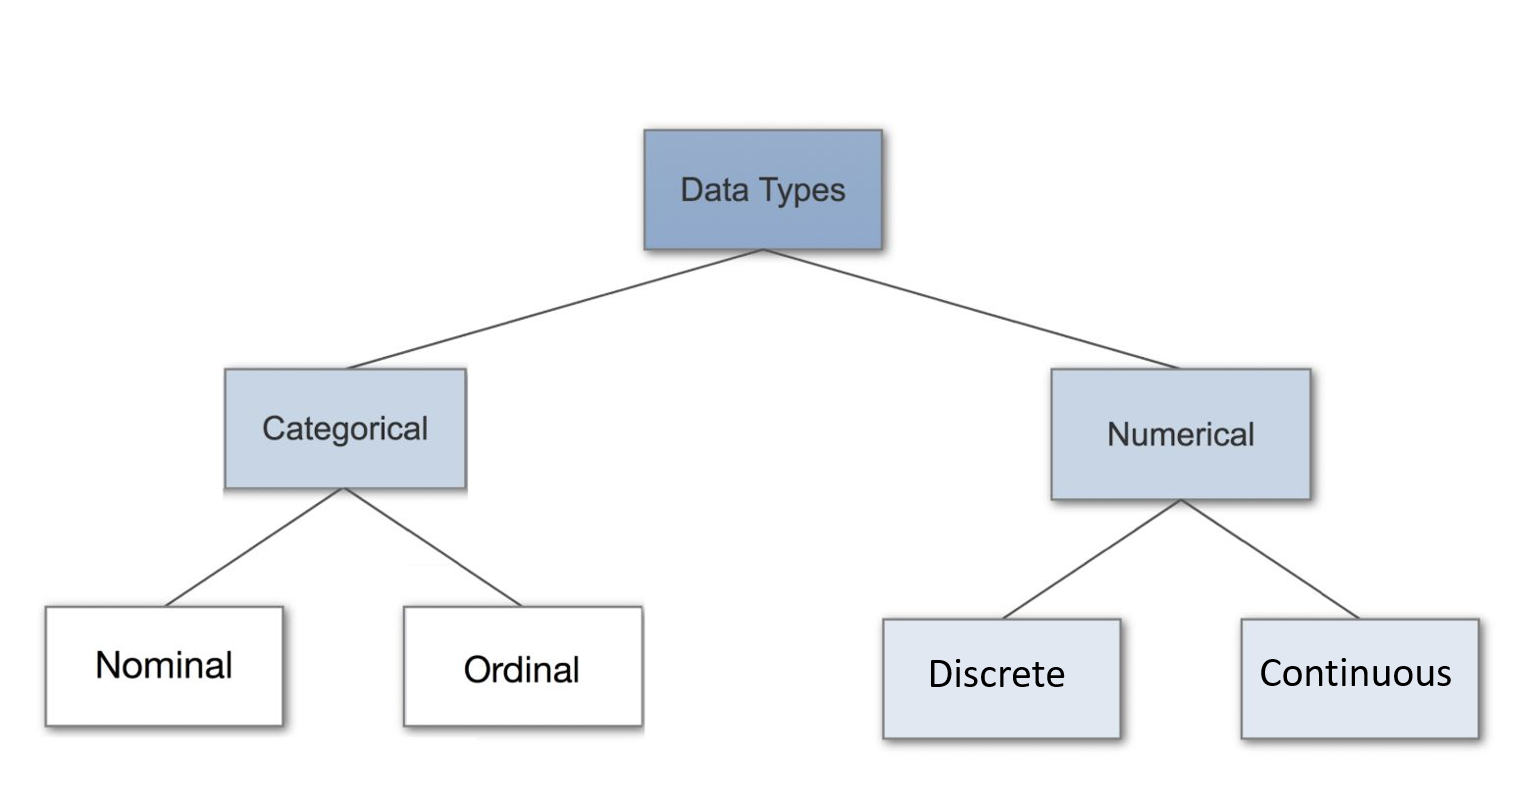

In [10]:
from IPython.display import Image
Image(filename=data_path+'datatype.png', width=600)

### Plot variables distributions to look at your data | DISTPLOT

* select other features to see theirdistributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


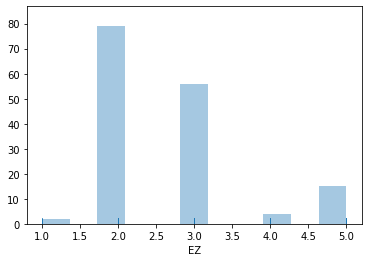

In [14]:
# select feature number
i = 2
x = df.iloc[:,i]
sns.distplot(x, kde=False, rug=True, axlabel = df.columns[i]);

## 3. Preprocessing 

In [15]:
# check missing values
print(pd.isna(df).sum())

Unnamed: 0     0
ID             0
EZ             0
D-IN           0
CRS-R          0
LCF            0
TR             0
RESP          12
RBI-ST-A       0
RBI-ST-B       0
PSH-AM-1       0
N-CRS-1       12
PSH-AM-2       0
N-CRS-2       12
PSH-AM-4M     14
TARGET         0
dtype: int64


#### For this time we decide to drop subject with missing variables

In [16]:
df.dropna(inplace = True)

In [17]:
pd.isna(df).sum()

Unnamed: 0    0
ID            0
EZ            0
D-IN          0
CRS-R         0
LCF           0
TR            0
RESP          0
RBI-ST-A      0
RBI-ST-B      0
PSH-AM-1      0
N-CRS-1       0
PSH-AM-2      0
N-CRS-2       0
PSH-AM-4M     0
TARGET        0
dtype: int64

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 155
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  130 non-null    int64  
 1   ID          130 non-null    object 
 2   EZ          130 non-null    int64  
 3   D-IN        130 non-null    int64  
 4   CRS-R       130 non-null    int64  
 5   LCF         130 non-null    int64  
 6   TR          130 non-null    int64  
 7   RESP        130 non-null    float64
 8   RBI-ST-A    130 non-null    int64  
 9   RBI-ST-B    130 non-null    int64  
 10  PSH-AM-1    130 non-null    int64  
 11  N-CRS-1     130 non-null    float64
 12  PSH-AM-2    130 non-null    int64  
 13  N-CRS-2     130 non-null    float64
 14  PSH-AM-4M   130 non-null    float64
 15  TARGET      130 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 17.3+ KB
None


## 3. Machine Learning 

### 3.1 Select  training  and target variable

In [19]:
# Set target variable and 
# to begin with, remove first four cols, the target variable and the related variables
data = df.copy()

y = data['TARGET'].copy()
X = data.copy()
X.drop(['Unnamed: 0', 'ID', 'TARGET'], axis=1, inplace = True)

# In case you want to selct only some features
# X__input = X[['D-IN', 'CRS-R', 'LCF', 'PSH-AM-1','PSH-AM-2', 'PSH-AM-4M']]

In [20]:
X.head()
#y.head()

,EZ,D-IN,CRS-R,LCF,TR,RESP,RBI-ST-A,RBI-ST-B,PSH-AM-1,N-CRS-1,PSH-AM-2,N-CRS-2,PSH-AM-4M
0,3,1,0,-4,1,2.0,-500,-100,4,0.0,3,0.0,3.0
1,3,3,-18,-6,1,2.0,-500,-100,20,2.0,17,2.0,8.0
2,2,1,-1,-3,1,1.0,-500,-100,3,0.0,3,0.0,1.0
3,2,2,-7,-2,1,2.0,-500,-100,2,0.0,4,0.0,2.0
4,3,3,-15,-6,0,1.0,-450,-100,17,2.0,16,1.0,2.0


#### Count responding subjects (TARGET = 1) VS Not-Responding Subjects (TARGET = 0) | Is the sample balanced?

In [21]:
# Responding
R = df[ df['TARGET'] == 1]['TARGET'].sum()
# Not responding
NR = df[ df['TARGET'] == 0]['TARGET'].value_counts()
print(f'(Responding Subjects, Not responding Subjects): {R, NR[0]}')

(Responding Subjects, Not responding Subjects): (85, 45)


### 3.2 Model Selection | Random Forest

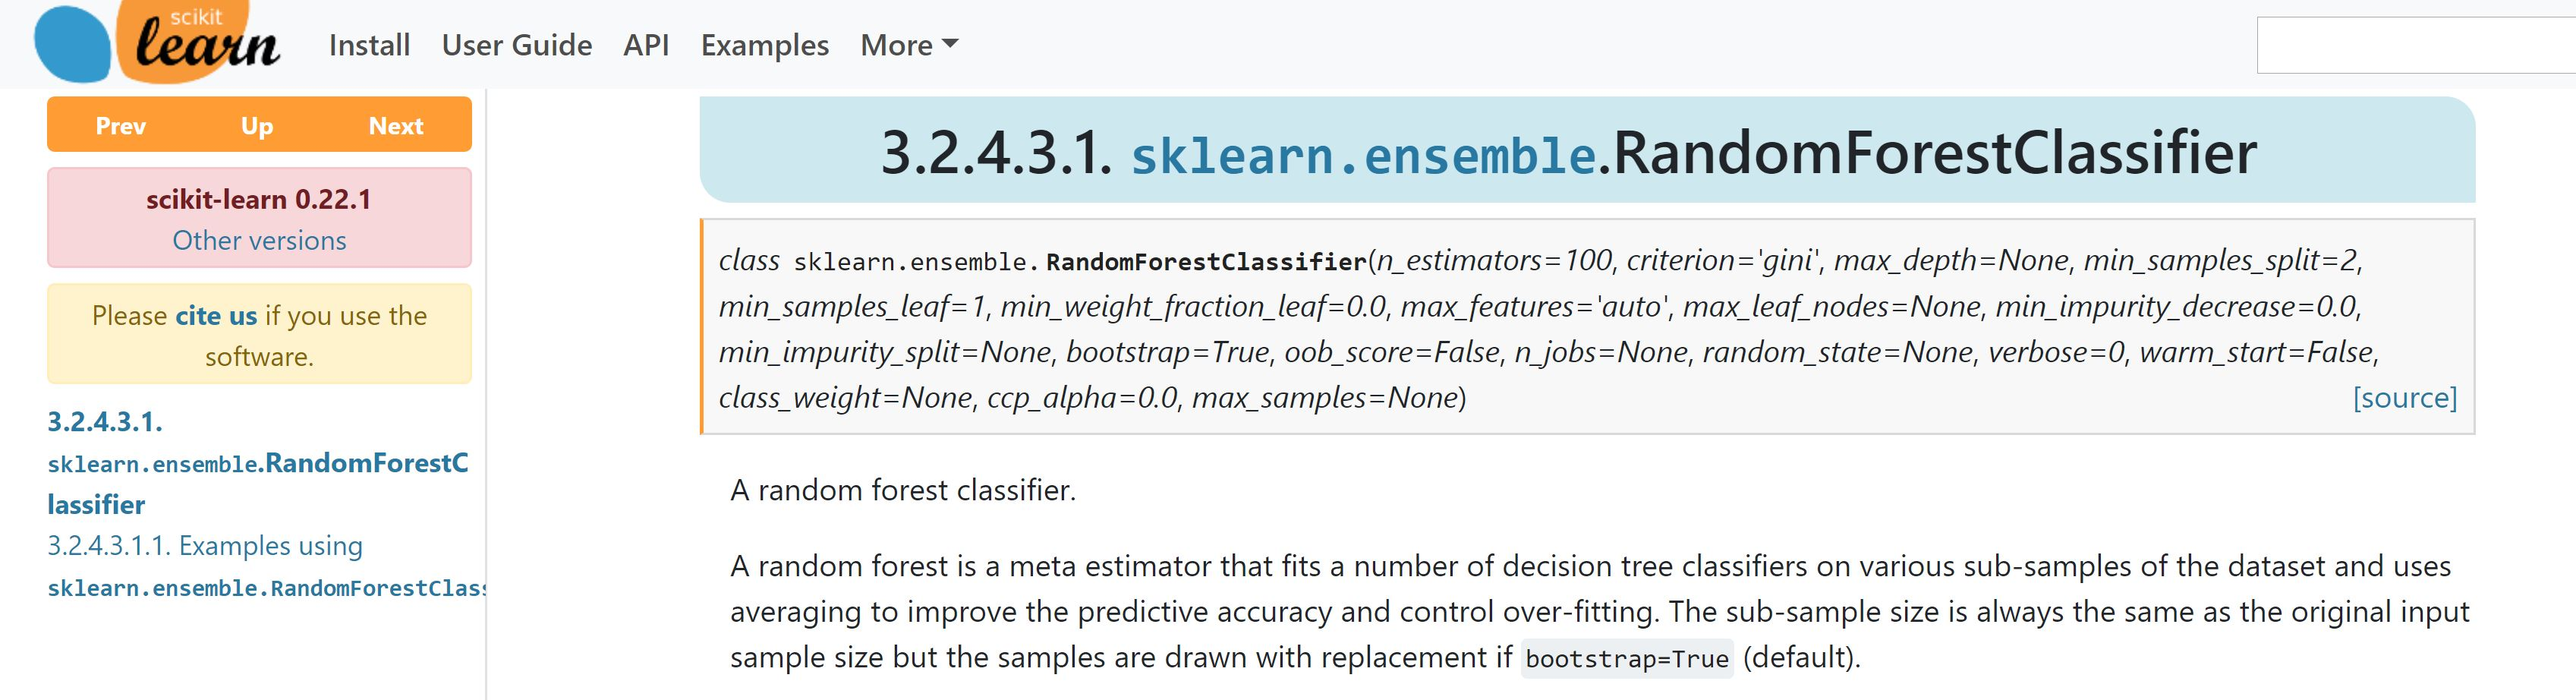

In [23]:
from IPython.display import Image
Image(filename=data_path+'RF__scikitelarn.JPG', width=1020)

#### Some main hyperparameters
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


* **n_estimators**     : # of decision tree classifers 
* **criterion / objective function**        : function to measure the quality of a split.
* **max_depth**        : the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split**: optional (default=2) The minimum number of samples required to split an internal node
* **class_weight**         : The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown. 



### 3.3 Optimization of  "N_ESTIMATORS" hyperparam

* Let' use a K-fold Cross-Validation approach

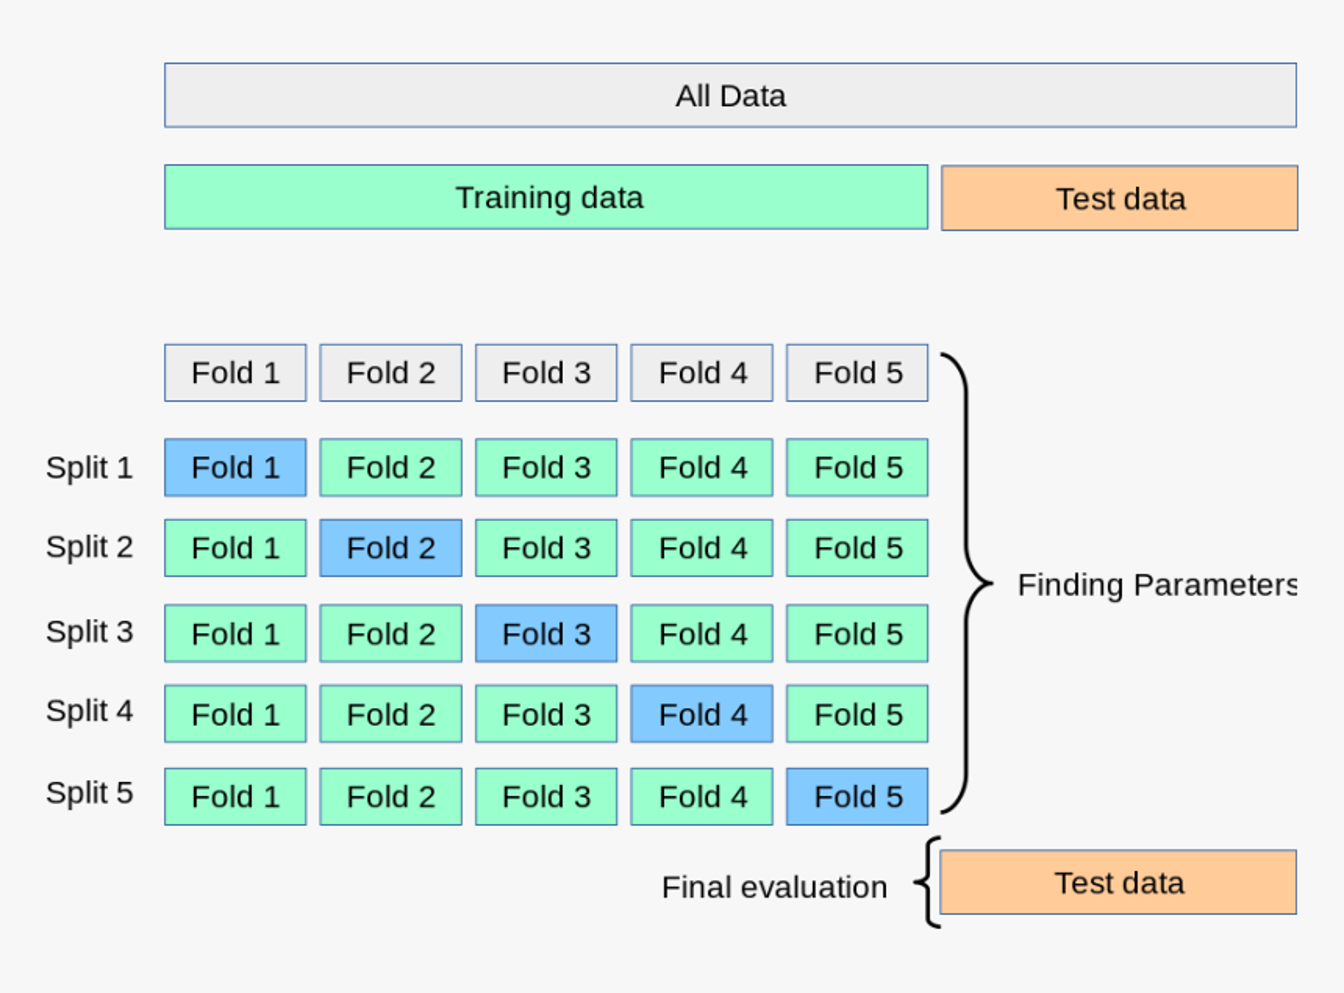

In [25]:
from IPython.display import Image
Image(filename=data_path+'cross-validation-k-fold-cross.png', width=600)

In [26]:
# Define hyperparameters and storage functions

k_out   = 10     # number of iterations
k_in    = 5     # k-fold cross validation

n_estimators  = [3, 9, 16, 32, 64, 100] # 200 32, 64, 100

train_results = []
test_results  = []
val_results  = []

train_results_acc = []
test_results_acc  = []
val_results_acc = []

acc = np.zeros(k_in)
sens = np.zeros(k_in)
spec = np.zeros(k_in)
roc = np.zeros(k_in)

acc_avg  = np.zeros(k_out)
sens_avg = np.zeros(k_out)
spec_avg = np.zeros(k_out) 
auc_avg = np.zeros(k_out) 

In [33]:
i = 0

while i<k_out: # set number of iterations

    # Split training and testing, then use training set for the k-fold cross validation
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10, shuffle=True, stratify = y)
    
    skf = StratifiedKFold(n_splits=k_in, shuffle = True)
    for train_index, val_index in skf.split(X_train, Y_train):
        
        # 4-folds for traing
        X_tr = X_train.iloc[train_index]
        y_tr = Y_train.iloc[train_index]  
        
        # 1 fold for validation
        X_val = X_train.iloc[val_index]
        y_val = Y_train.iloc[val_index]    

        for estimator in n_estimators:
            rf = RandomForestClassifier(n_estimators=estimator, class_weight='balanced_subsample', n_jobs=-1)
            rf.fit(X_tr, y_tr) 
            
            train_pred = rf.predict(X_tr)
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tr, train_pred)
            roc_auc = auc(false_positive_rate, true_positive_rate)
            train_acc = accuracy_score(y_tr, train_pred)                
            train_results.append(roc_auc)
            train_results_acc.append(train_acc)
            
            val_pred = rf.predict(X_val)
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, val_pred)
            roc_auc = auc(false_positive_rate, true_positive_rate)
            val_acc = accuracy_score(y_val, val_pred) 
            val_results.append(roc_auc)
            val_results_acc.append(val_acc)      
                  
    i +=1

KeyboardInterrupt: ignored

In [28]:
i

10

### Plotting  AUC vs N_ESTIMATORS

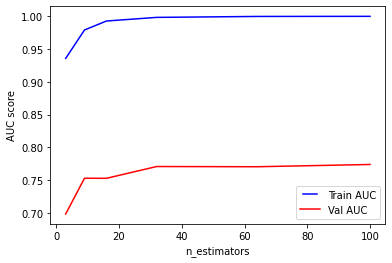

0    0.698236
1    0.752861
2    0.752722
3    0.770722
4    0.770403
5    0.773861
dtype: float64


In [29]:
# N ESTIMATORS | AUC
val_results_avg = np.sum(np.asarray(val_results).reshape((k_in*k_out, len(n_estimators))), axis = 0)/(k_in*k_out)
train_results_avg = np.sum(np.asarray(train_results).reshape((k_in*k_out, len(n_estimators))), axis = 0)/(k_in*k_out)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results_avg, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, val_results_avg, 'r', label='Val AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

print(pd.Series(val_results_avg))

###   <font color='red'> 3.4 DO IT YOURSELF: Plotting  ACCURACY vs N_ESTIMATORS </font>

###   <font color='red'> 3.5 DO IT YOURSELF: OPTIMIZE ANOTHER HYPERPARAMETER (e.g max_depth)  AND PLOT IT! </font>

### 3.6 Random Forest with Optimized Hyperparameters

In [30]:
# set params 

k_out   = 10    # number of splitting repetitions == iterations
n_estim = 64

acc = np.zeros(k_in)
sens = np.zeros(k_in)
spec = np.zeros(k_in)
roc = np.zeros(k_in)

acc_avg  = np.zeros(k_out)
sens_avg = np.zeros(k_out)
spec_avg = np.zeros(k_out) 
auc_avg = np.zeros(k_out) 

test_results_acc    = [] 
test_results_recall = []
test_results_auc    = []
test_results_spec   = []

In [31]:
i = 0
while i<k_out:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, stratify = y)

    # RANDOM FOREST
    model = RandomForestClassifier(n_estimators=n_estim, class_weight='balanced_subsample')  
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)

    # Calculate Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)  
    recall = recall_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()        
    spec = (tn / (tn + fp)) 

    test_results_acc.append(acc)      
    test_results_recall.append(recall)
    test_results_auc.append(roc_auc)
    test_results_spec.append(spec)

    i +=1

### 4. Performances | Evaluation Metrics

In [34]:
ACC    =  np.asarray(test_results_acc).mean()
RECALL =  np.asarray(test_results_recall).mean()
SPEC   =  np.asarray(test_results_spec).mean()
AUC    =  np.asarray(test_results_auc).mean()

print(ACC, 'Accuracy')    
print(RECALL, 'Recall') 
print(SPEC, 'Specificity')   
print(AUC, 'AUC')   

0.7615384615384616 Accuracy
0.8777777777777779 Recall
0.55 Specificity
0.7138888888888888 AUC
